In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [30]:
from sklearn.model_selection import train_test_split

features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

In [31]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [32]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [33]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

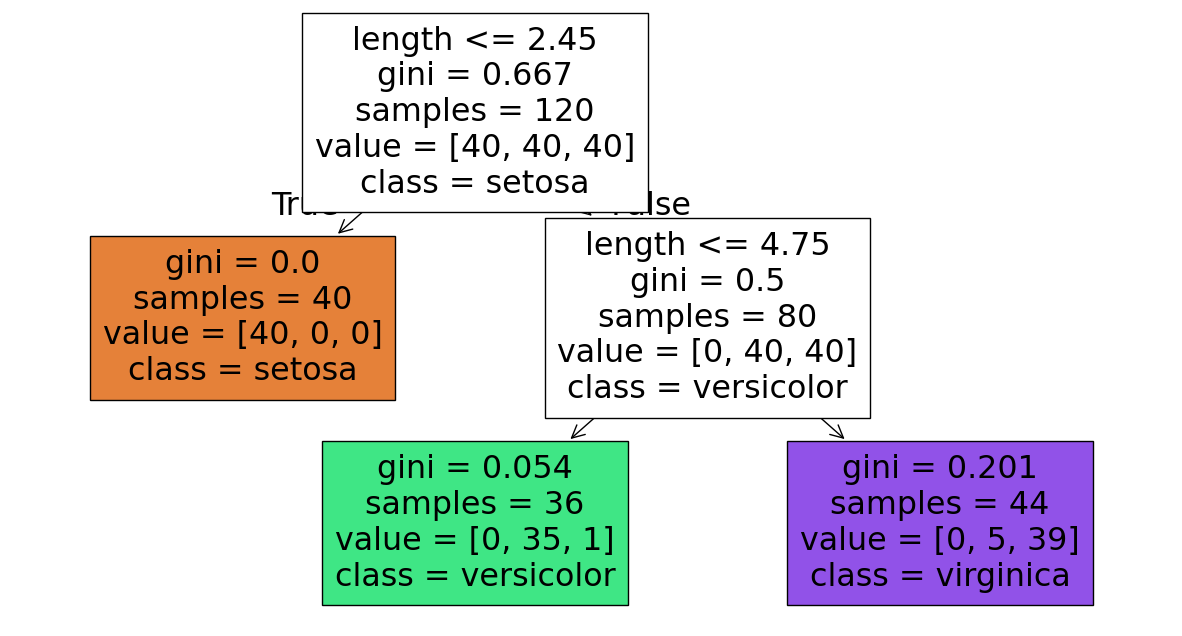

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(iris_tree,
                   feature_names=['length', 'width'],
                   class_names = list(iris.target_names),
                   filled=True)

ValueError: Filler values must be provided when X has more than 2 training features.

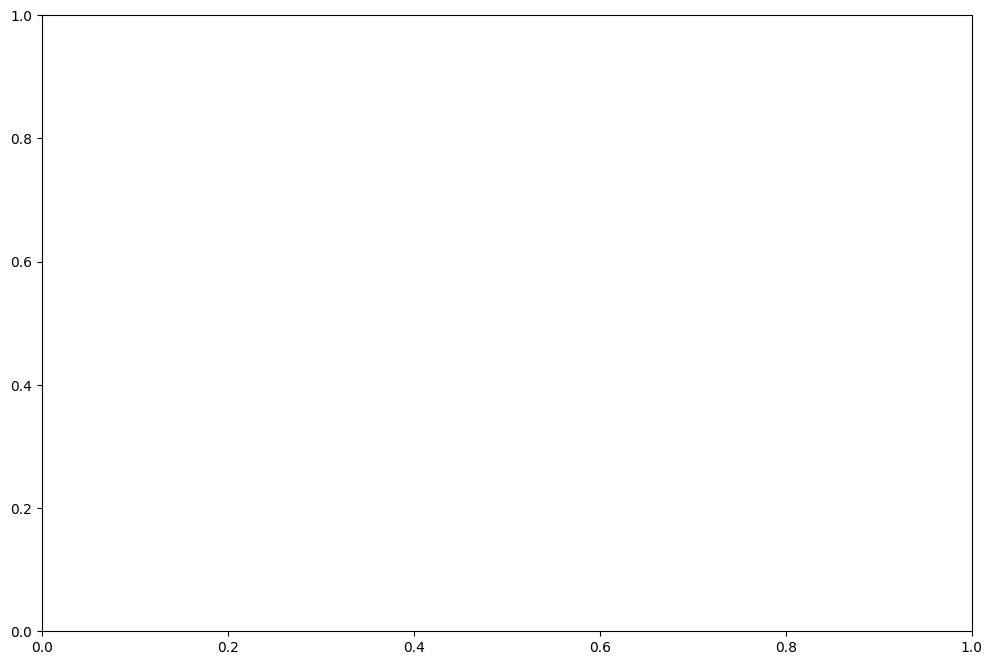

In [25]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

In [11]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

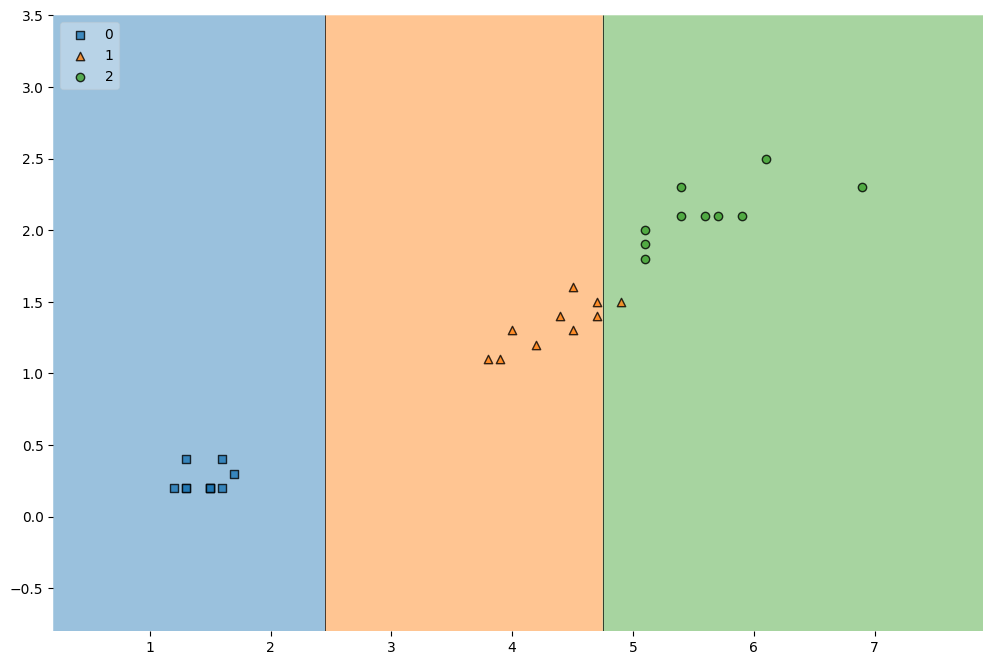

In [12]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

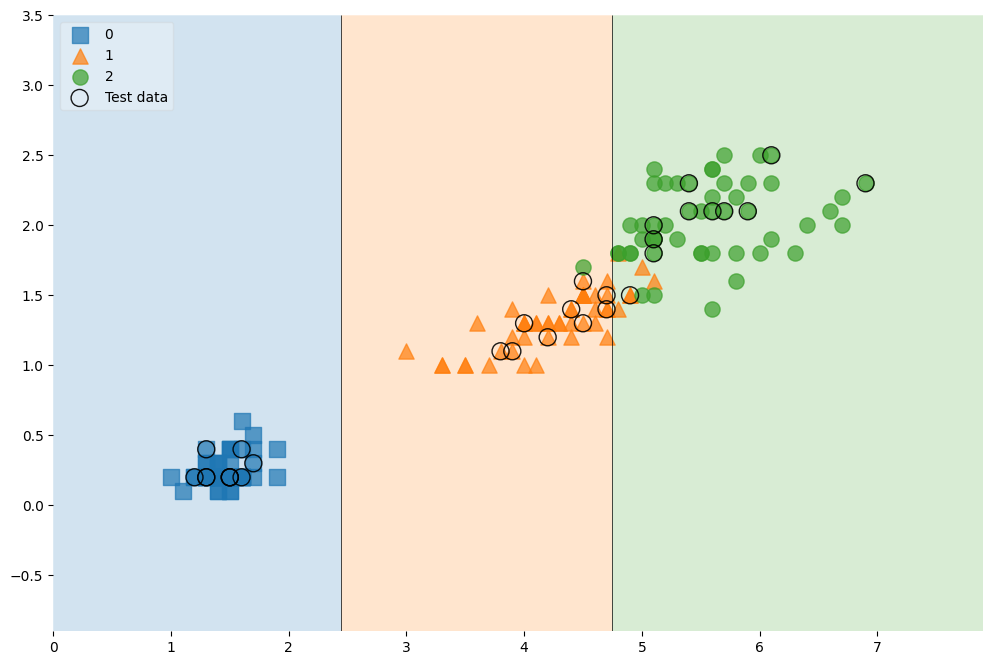

In [15]:
scatter_highlight_kwargs = {'s': 150, 'label': 'Test data', 'alpha': 0.9}
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels, 
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha': 0.2})
plt.show()

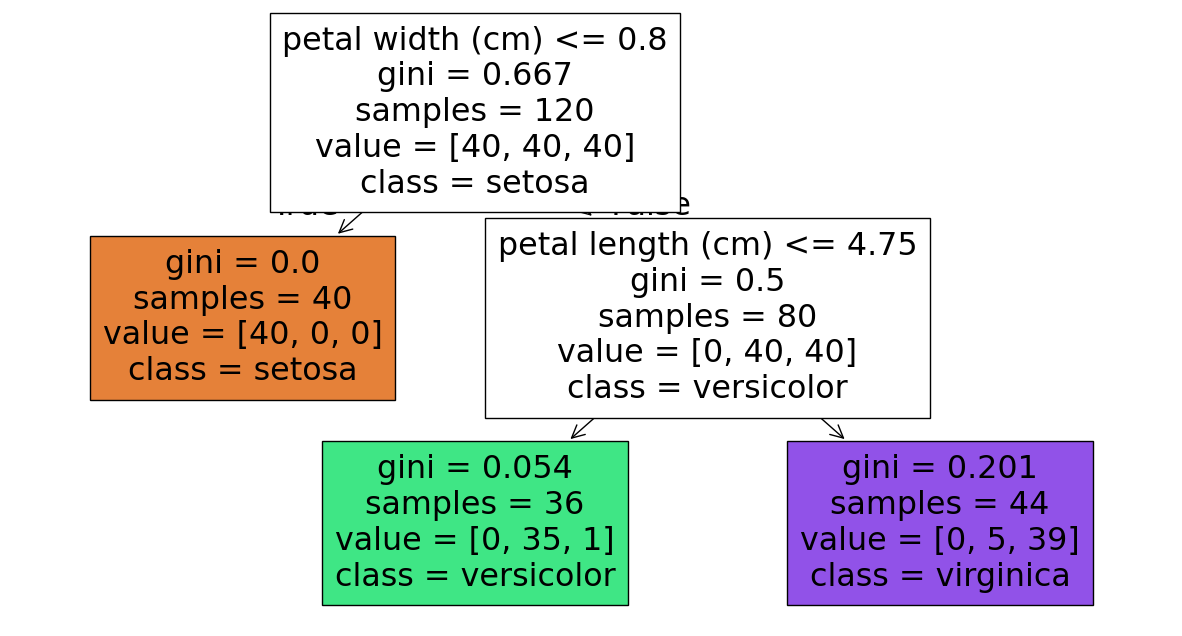

In [34]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(iris_tree,
                   feature_names=list(iris.feature_names),
                   class_names = list(iris.target_names),
                   filled=True)

In [23]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [28]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [29]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': np.float64(0.0),
 'sepal width (cm)': np.float64(0.0),
 'petal length (cm)': np.float64(0.421897810218978),
 'petal width (cm)': np.float64(0.578102189781022)}

In [37]:
name, importance = zip(*iris_clf_model)

print(list(name))
print(list(importance))

ValueError: too many values to unpack (expected 2)